<a href="https://colab.research.google.com/github/osama-kheshaifaty/SPE-KSA-WORKSHOP-2025/blob/main/NN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset Information:
<class 'pandas.core.fram

<ipython-input-1-689b9c0cccc9>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


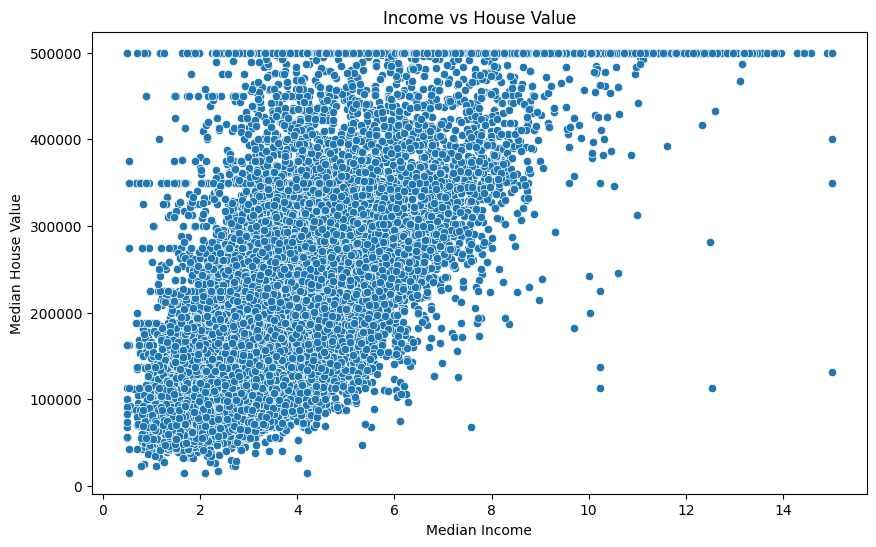

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


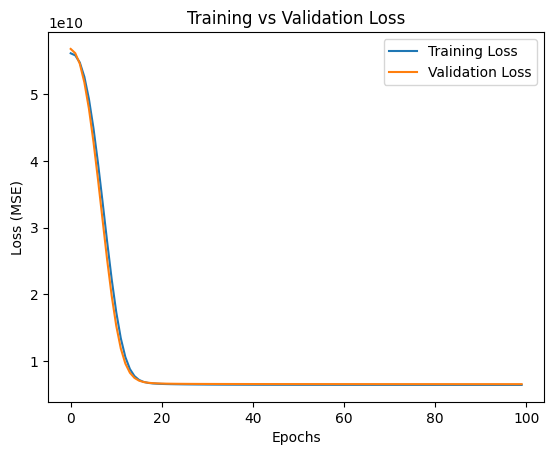

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model Evaluation Metrics:
Mean Squared Error (MSE): 6576765782.047791
R-squared (R²): 0.49811349805642524


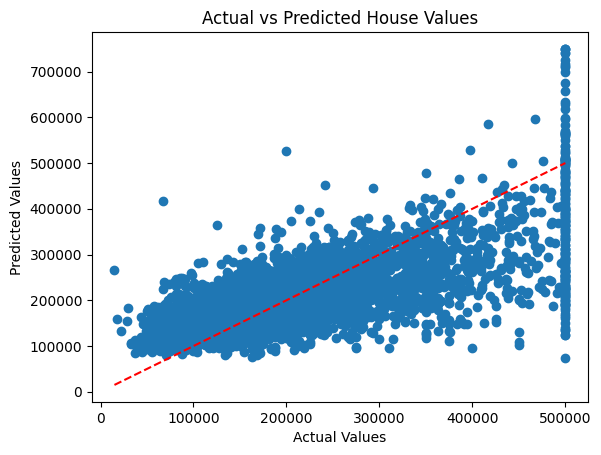

In [1]:
# Fundamentals of Python and Machine Learning Workshop
# Simple Neural Network Hands-On Example

# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Loading the Dataset
# Using a small California Housing sample
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

# Step 3: Exploring the Data
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nChecking for missing values:")
print(data.isnull().sum())

# Handling missing values
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# Step 4: Visualizing the Data
plt.figure(figsize=(10,6))
sns.scatterplot(x="median_income", y="median_house_value", data=data)
plt.title('Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Step 5: Feature Selection
features = ["median_income", "housing_median_age"]
target = "median_house_value"

X = data[features]
y = data[target]

# Step 6: Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling (Important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Building the Neural Network Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Step 9: Training the Model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)

# Step 10: Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Step 11: Making Predictions
y_pred = model.predict(X_test_scaled)

# Step 12: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Step 13: Visualizing Predictions vs Actual
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted House Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()